In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("Data Set/CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.select_dtypes(include=["int64","float64"])

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
corr_matrix = df.corr()
print(corr_matrix)

                    car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -

C:\Users\Rudra\AppData\Local\Temp\ipykernel_24840\3083230406.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


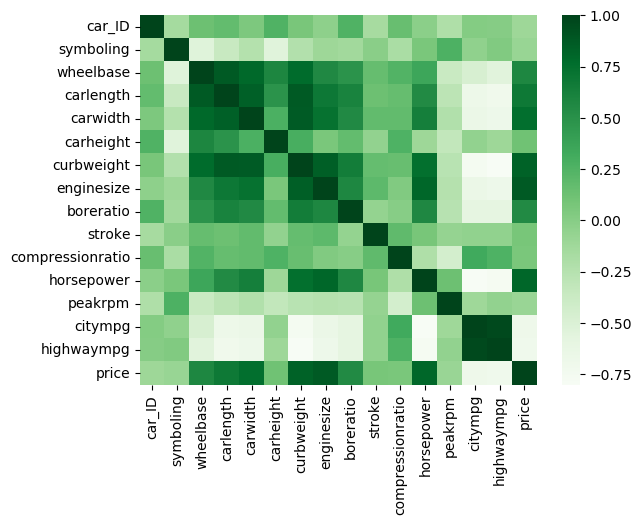

In [9]:
sns.heatmap(corr_matrix,cmap="Greens")

In [12]:
imp_cols=['wheelbase','carlength', 'carwidth','curbweight','boreratio','horsepower','citympg', 'highwaympg','price']
imp_cols

['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'boreratio',
 'horsepower',
 'citympg',
 'highwaympg',
 'price']

In [13]:
training_data=df[imp_cols]
training_data

,wheelbase,carlength,carwidth,curbweight,boreratio,horsepower,citympg,highwaympg,price
0,88.6,168.8,64.1,2548,3.47,111,21,27,13495.0
1,88.6,168.8,64.1,2548,3.47,111,21,27,16500.0
2,94.5,171.2,65.5,2823,2.68,154,19,26,16500.0
3,99.8,176.6,66.2,2337,3.19,102,24,30,13950.0
4,99.4,176.6,66.4,2824,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,3.78,114,23,28,16845.0
201,109.1,188.8,68.8,3049,3.78,160,19,25,19045.0
202,109.1,188.8,68.9,3012,3.58,134,18,23,21485.0
203,109.1,188.8,68.9,3217,3.01,106,26,27,22470.0


In [14]:
x=training_data.drop(columns=["price"])
y=training_data["price"]

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3,random_state=50)

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 77 to 176
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wheelbase   143 non-null    float64
 1   carlength   143 non-null    float64
 2   carwidth    143 non-null    float64
 3   curbweight  143 non-null    int64  
 4   boreratio   143 non-null    float64
 5   horsepower  143 non-null    int64  
 6   citympg     143 non-null    int64  
 7   highwaympg  143 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 10.1 KB


In [19]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(143, 8)
(62, 8)
(143,)
(62,)


In [20]:
LR=LinearRegression()

In [21]:
LR.fit(X_train,Y_train)

LinearRegression()

In [22]:
y_pred=LR.predict(X_test)

In [23]:
list(zip(Y_test,y_pred))

[(16695.0, 18249.35753348426),
 (11199.0, 14680.70347386568),
 (20970.0, 14958.787508742782),
 (40960.0, 32111.985662343737),
 (11259.0, 13060.308245452805),
 (6575.0, 6628.563543174256),
 (11900.0, 16903.008646342583),
 (23875.0, 22042.276287262604),
 (8845.0, 9215.94825557767),
 (5499.0, 4936.077402927222),
 (12629.0, 18316.257762990193),
 (8238.0, 6940.8941448210535),
 (28176.0, 24114.172655101996),
 (9298.0, 10756.768138959167),
 (6692.0, 6496.959963122143),
 (9549.0, 10450.466912202959),
 (15510.0, 13952.525848465943),
 (7957.0, 9747.320846090217),
 (9279.0, 12642.135911877398),
 (13845.0, 11516.192804557344),
 (7999.0, 5538.349672119417),
 (14869.0, 18994.302245678322),
 (6229.0, 6326.475871583556),
 (15998.0, 21935.611442972702),
 (5118.0, 6558.349135799552),
 (16845.0, 18480.688599157686),
 (13200.0, 19062.93966845343),
 (7129.0, 7734.883682652064),
 (8249.0, 6259.4039602306875),
 (9639.0, 13572.556878864896),
 (12764.0, 18196.12672620223),
 (8358.0, 6882.9862035818005),
 (5389

In [24]:
mean_absolute_error(Y_test,y_pred)

2946.7657438187134